In [23]:
# imported the keras library and other
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Input, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [24]:
# imported the csv file into dataframe
dataset = pd.read_csv("BreastCancer.csv")

In [25]:
# selected 1 st column as target and other 29 as features for the model
X = dataset.iloc[:, 2:32].values
y = dataset.iloc[:, 1].values

In [26]:
print(dataset.iloc[:, 1].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [27]:
le = LabelEncoder()
# encoded the string to encoded labels M=1, B=0
y = le.fit_transform(y)

In [28]:
# normalized the data before sending to the model
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [29]:
# used train_test_split to spplit the data into test and training
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=45)

In [31]:
# Model Implementation
my_first_nn = Sequential()  # create model
my_first_nn.add(Dense(20, input_dim=30, activation='relu'))  # hidden layer
my_first_nn.add(Dense(32, input_dim=30, activation='relu'))  # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid'))  # output layer
my_first_nn.compile(loss='binary_crossentropy',
                    optimizer='adam', metrics=['accuracy'])
history=my_first_nn.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=100, verbose=0,
                                     initial_epoch=0)

In [32]:
print(history.params)

{'verbose': 0, 'epochs': 100, 'steps': 13}


In [33]:
# printed the summary of the model
print(my_first_nn.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_17 (Dense)             (None, 32)                672       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 1,325
Trainable params: 1,325
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
print(my_first_nn.evaluate(X_test, y_test))

6/6 [==============================] - 0s 600us/step - loss: 0.1793 - accuracy: 0.9708
[0.1793135106563568, 0.9707602262496948]


c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

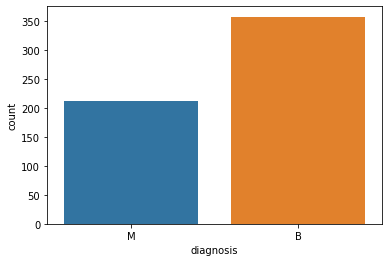

In [35]:
import seaborn as sns
# plotteed the target counts below
sns.countplot(dataset['diagnosis'], label = 'count')

In [36]:
# printed all the keys of the fit model output
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


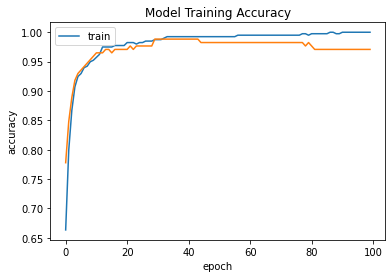

In [37]:
# plotted the train and test accurancy of the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [38]:
# Model Implementation
my_first_nn = Sequential()  # create model
# hidden layer
my_first_nn.add(Dense(20, input_dim=30, activation='relu'))
# hidden layer
my_first_nn.add(Dense(25, input_dim=30, activation='relu'))
# hidden layer
my_first_nn.add(Dense(32, input_dim=30, activation='relu')) 
# output layer
my_first_nn.add(Dense(1, activation='sigmoid'))  
my_first_nn.compile(loss='binary_crossentropy',
                    optimizer='adam', metrics=['accuracy'])
history=my_first_nn.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=100, verbose=0,
                                     initial_epoch=0)

In [39]:
# evaluated the model again.
print(my_first_nn.evaluate(X_test, y_test))

6/6 [==============================] - 0s 799us/step - loss: 0.1360 - accuracy: 0.9766
[0.13597993552684784, 0.9766082167625427]


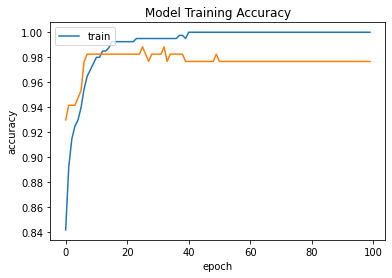

In [40]:
# plotted the model accuracy for train and test data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()